### Part 3: Trajectory Evaluation and g2o

_Refer to the example notebooks for installation instructions_

### Evo

So you've implemented 2D SLAM, great! Now, what? We need a measure of how good the trajectory is. The error/loss used earlier doesn't tell us much about how the trajectory differs from the ground truth. Here, we try to do just this - compute error metrics. Rather than computing these from scratch, we will just Evo - https://github.com/MichaelGrupp/evo/.

Look at the absolute pose error (APE) and relative pose error (RPE). What do they capture and how are they calculated (descriptive answer)? How do these metrics differ in methodology? Can we determine if the error is more along the x/y axis?

Answer the above questions and report errors for the obtained trajectory.

In [1]:
#pip install evo --upgrade --no-binary evo

# Converting g2o to Kitti

In [2]:
#python g2o_to_kitti.py gt_poses.g2o gt_poses.kitti
#python g2o_to_kitti.py final_traj.g2o final_traj_kit.kitti


<table><tr>
<td> <img src="../results/r_img0.png" alt="Drawing" style="width: 400px;"/> </td>
<td> <img src="../results/r_imgg.png" alt="Drawing" style="width: 400px;"/> </td>
</tr></table>

## RPE

In [3]:
#evo_rpe kitti gt_poses.kitti final_traj_kit.kitti -v --plot --plot_mode xy

--------------------------------------------------------------------------------
Loaded 120 poses from: gt_poses.kitti
Loaded 120 poses from: final_traj_kit.kitti

Found 119 pairs with delta 1 (frames) among 120 poses using consecutive pairs.
Compared 119 relative pose pairs, delta = 1 (frames) with consecutive pairs.
Calculating RPE for translation part pose relation...

RPE w.r.t. translation part (m)
for delta = 1 (frames) using consecutive pairs
(not aligned)

| Metric  | Value     |
| ------- | --------- |
| max     | 3.145576  |
| mean    | 0.151885  |
| median  | 0.118547  |
| min     | 0.001127  |
| rmse    | 0.322095  |
| sse     | 12.345643 |
| std     | 0.284035  |



<table><tr>
<td> <img src="../results/r_img1.png" alt="Drawing" style="width: 400px;"/> </td>
<td> <img src="../results/r_img2.png" alt="Drawing" style="width: 400px;"/> </td>
</tr></table>

## APE

In [4]:
#evo_ape kitti gt_poses.kitti final_traj_kit.kitti -v --plot --plot_mode xy

Loaded 120 poses from: gt_poses.kitti
Loaded 120 poses from: final_traj_kit.kitti

Compared 120 absolute pose pairs.
Calculating APE for translation part pose relation...

APE w.r.t. translation part (m)
(not aligned)

| Metric | Value |
| ------ | ------|
|max	|7.353450|
|mean	|2.340368|
|median	|1.697935|
|min	|0.000216|
|rmse	|3.016778|
|sse	|1092.114102|
|std	|1.903583|



<table><tr>
<td> <img src="../results/r_img3.png" alt="Drawing" style="width: 400px;"/> </td>
<td> <img src="../results/r_img4.png" alt="Drawing" style="width: 400px;"/> </td>
</tr></table>


## traj

In [5]:
#evo_traj kitti gt_poses.kitti final_traj_kit.kitti -v --plot --plot_mode xy

Loaded 120 poses from: gt_poses.kitti
Loaded 120 poses from: final_traj_kit.kitti

name:	gt_poses
infos:
|      |     |
|------|-----|
|nr. of poses	|120|
|path length (m)|	52.976517997999295|
|pos_end (m)	|[-2.8 -4.5  0. ]|
|pos_start (m)	|[-8.  5.  0.]|

name:	final_traj_kit
infos:
|      |     |
| -----|----|
|nr. of poses	|120|
|path length (m)	|57.072570151675336|
|pos_end (m)	|[-4.69342647  0.78109715  0.        ]|
|pos_start (m)	|[-8.00020895  4.9999436   0.        ]|


<table><tr>
<td> <img src="../results/r_img5.png" alt="Drawing" style="width: 300px;"/> </td>
<td> <img src="../results/r_img6.png" alt="Drawing" style="width: 300px;"/> </td>
<td> <img src="../results/r_img7.png" alt="Drawing" style="width: 300px;"/> </td>
</tr></table>


Try to play around with this tool and add any other plots that you think might be relevant/interesting.

### g2o

Install g2o as mentioned in `examples/g2o.ipynb` and optimise `edges.txt`, the file you used earlier. Also use `g2o_viewer` and optimize `intel` (a trajectory in the Intel research lab) and `sphere`. They should look something like:


<table><tr>
<td> <img src="../misc/intel.jpg" alt="Drawing" style="width: 250px;"/> </td>
<td> <img src="../misc/sphere.jpg" alt="Drawing" style="width: 250px;"/> </td>
</tr></table>

Write briefly about your observations and try out few options in the GUI. What do they do, how do they perform?

In [6]:
#pip install -U g2o-python

In [1]:
import g2o
import numpy as np
import math
from matplotlib import pyplot as plt
import os

In [3]:
def readVertex(fileName):
    f = open(fileName, 'r')
    A = f.readlines()
    f.close()

    x_arr = []
    y_arr = []
    theta_arr = []

    for line in A:
        if "VERTEX_SE2" in line:
            (ver, ind, x, y, theta) = line.split()
            x_arr.append(float(x))
            y_arr.append(float(y))
            theta_arr.append(float(theta.rstrip('\n')))

    return np.array([x_arr, y_arr, theta_arr])

In [4]:
def draw(X, Y, THETA):
    ax = plt.subplot(111)
    ax.plot(X, Y, 'ro')
    plt.plot(X, Y, 'c-')

    for i in range(len(THETA)):
        x2 = 0.25*math.cos(THETA[i]) + X[i]
        y2 = 0.25*math.sin(THETA[i]) + Y[i]
        plt.plot([X[i], x2], [Y[i], y2], 'g->')

    plt.show()

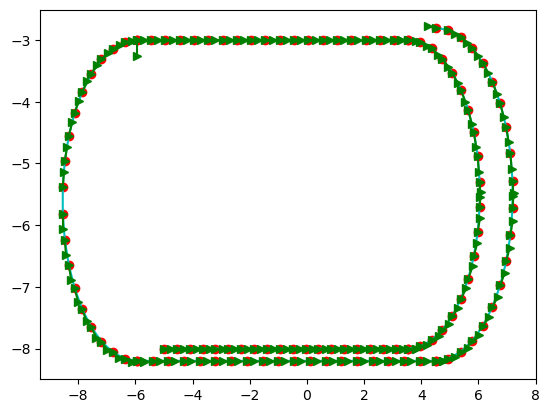

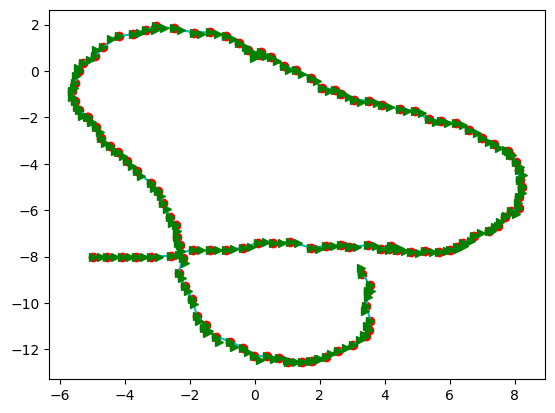

In [5]:
x_g,y_g,theta_g= readVertex("../results/gt_poses.g2o")
x,y,theta= readVertex("../results/edges-poses.g2o")
draw(x_g,y_g,theta_g)
draw(x,y,theta)

In [12]:
def optimize():
    cmd = "g2o -o results/optimal.g2o results/edge-poses.g2o"
    os.system(cmd)

In [13]:
def update_odom(X, Y, THETA):
    g2o = open('results/edge-poses.g2o', 'w')

    for i, (x, y, theta) in enumerate(zip(X,Y,THETA)):
        line = "VERTEX_SE2 " + str(i) + " " + str(x) + " " + str(y) + " " + str(theta)
        g2o.write(line)
        g2o.write("\n")

    info_mat = "500.0 0.0 0.0 500.0 0.0 500.0"
    for i in range(1, len(X)):
        p1 = (X[i-1], Y[i-1], THETA[i-1])
        p2 = (X[i], Y[i], THETA[i])
        T1_w = np.array([[math.cos(p1[2]), -math.sin(p1[2]), p1[0]], [math.sin(p1[2]), math.cos(p1[2]), p1[1]], [0, 0, 1]])
        T2_w = np.array([[math.cos(p2[2]), -math.sin(p2[2]), p2[0]], [math.sin(p2[2]), math.cos(p2[2]), p2[1]], [0, 0, 1]])
        T2_1 = np.dot(np.linalg.inv(T1_w), T2_w)
        del_x = str(T2_1[0][2])
        del_y = str(T2_1[1][2])
        del_theta = str(math.atan2(T2_1[1, 0], T2_1[0, 0]))

        line = "EDGE_SE2 "+str(i-1)+" "+str(i)+" "+del_x+" "+del_y+" "+del_theta+" "+info_mat
        g2o.write(line)
        g2o.write("\n")

    g2o.write("FIX 0")
    g2o.write("\n")
    
    return g2o


def update_edges(X, Y, THETA, g2o):
    sz = X.size

    pairs = []
    for i in range(0, 40, 2):
        pairs.append((i, i+80))

    info_mat = "700.0 0.0 0.0 700.0 0.0 700.0"

    for p in pairs:
        p1 = (X[p[0]], Y[p[0]], THETA[p[0]])
        p2 = (X[p[1]], Y[p[1]], THETA[p[1]])
        T1_w = np.array([[math.cos(p1[2]), -math.sin(p1[2]), p1[0]], [math.sin(p1[2]), math.cos(p1[2]), p1[1]], [0, 0, 1]])
        T2_w = np.array([[math.cos(p2[2]), -math.sin(p2[2]), p2[0]], [math.sin(p2[2]), math.cos(p2[2]), p2[1]], [0, 0, 1]])
        T2_1 = np.dot(np.linalg.inv(T1_w), T2_w)
        del_x = str(T2_1[0][2])
        del_y = str(T2_1[1][2])
        del_theta = str(math.atan2(T2_1[1, 0], T2_1[0, 0]))

        line = "EDGE_SE2 "+str(p[0])+" "+str(p[1])+" "+del_x+" "+del_y+" "+del_theta+" "+info_mat
        g2o.write(line)
        g2o.write("\n")

    g2o.close()



In [28]:
def drawTwo(X1, Y1, THETA1, X2, Y2, THETA2):
    ax = plt.subplot(111)
    ax.plot(X1, Y1, 'ro', label='Ground Truth')
    plt.plot(X1, Y1, 'k-')

    for i in range(len(THETA1)):
        x2 = 0.25*math.cos(THETA1[i]) + X1[i]
        y2 = 0.25*math.sin(THETA1[i]) + Y1[i]
        plt.plot([X1[i], x2], [Y1[i], y2], 'r->')

    ax.plot(X2, Y2, 'bo', label='Optimized')
    plt.plot(X2, Y2, 'k-')

    for i in range(len(THETA2)):
        x2 = 0.25*math.cos(THETA2[i]) + X2[i]
        y2 = 0.25*math.sin(THETA2[i]) + Y2[i]
        plt.plot([X2[i], x2], [Y2[i], y2], 'b->')

    plt.legend()
    plt.show()


In [29]:
g2o =update_odom(x,y,theta)
update_edges(x_g,y_g,theta_g, g2o)

In [30]:
optimize()

Read input from results/edge-poses.g2o
Loaded 120 vertices
Loaded 139 edges
# graph is fixed by priors or already fixed vertex
Initial chi2 = 573823.532351
saving results/optimal.g2o ... done.


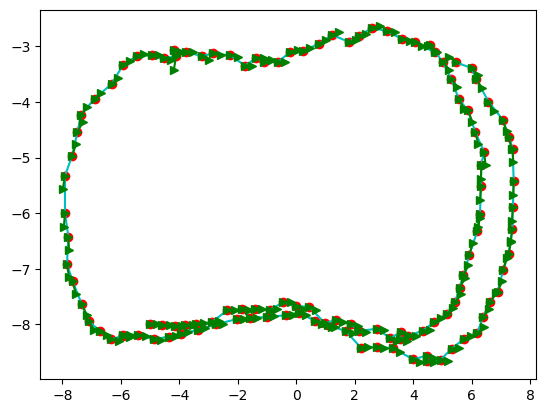

In [7]:
x_o,y_o,theta_o= readVertex("../results/optimal.g2o")
draw(x_o,y_o,theta_o)

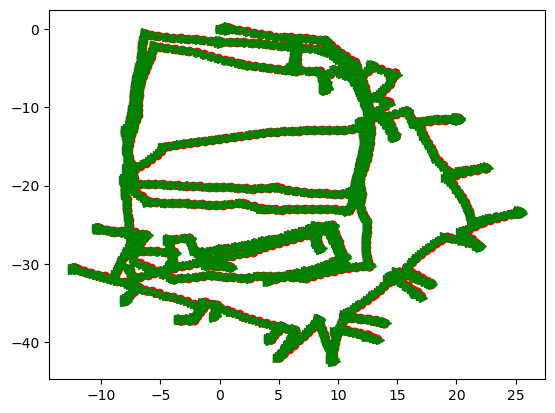

In [15]:
xi,yi,thetai= readVertex("..data/intel.g2o")
draw(xi,yi,thetai)


Read input from data/intel.g2o
Loaded 1228 vertices
Loaded 1483 edges
# graph is fixed by node 1227
Initial chi2 = 5149721.044789
saving results/intel_opt.g2o ... done.


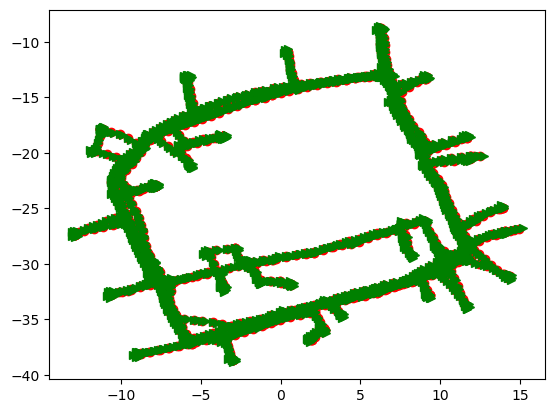

In [17]:
def optimize1():
    cmd = "g2o -o ../results/intel_opt.g2o ../data/intel.g2o"
    os.system(cmd)
optimize1()
x_i,y_i,theta_i= readVertex("../results/intel_opt.g2o")
draw(x_i,y_i,theta_i)

![initial](../results/sphere0.jpeg)
![initial](../results/sphere1.jpeg)